#7-1. 인공 신경망
: 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘

- MNIST 데이터셋: 머신러닝에서 붓꽃 데이터셋이 유명하듯이 딥러닝에서 뮤영한 데이터셋이다. 이 데이터는 0~9까지 손으로 쓴 숫자로 이루어져 있다.

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- load_data() 함수는 훈련 데이터와 테스트 데이터를 나누어 반환한다.

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


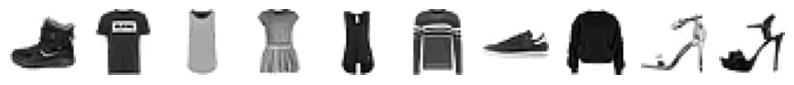

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10)) #그래프 쌓기
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')#담겨진 그래프
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


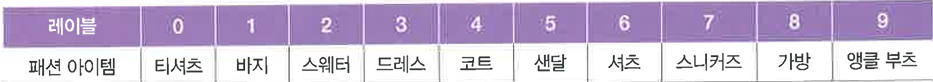

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


- 반복 횟수를 늘려도 성능이 크게 향상되지는 않는다.
 - 0.8303833... -> max_iter = 9
 - 0.8436999... -> max_iter = 20

- 확률적 경사 하강법, 로지스틱 회귀 모델이 가장 간단한 인공 신경망이다.

- 인공신경망
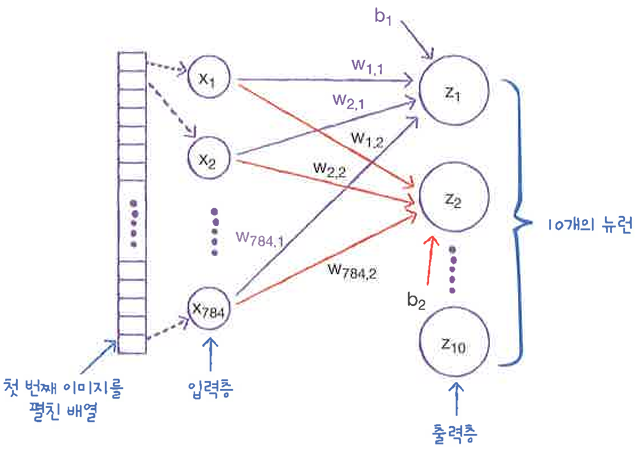

##텐서플로
: 구글이 오픈 소스로 공개한 딥러닝 라이브러리

In [ ]:
import tensorflow as tf

- 케라스: 텐서플로의 고수준 API
 - 케라스 라이브러리는 직접 GPU연산을 수행하지 않는다.
 - GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용한다. ex) 텐서플로, 씨아노, CNTK
- 딥러닝 라이브러리는 머신러닝 라이브러리와 달리 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다.

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state=42)

- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
- 딥러닝에서 데이터셋은 충분히 크기 때문이고, 훈련시간이 오래 걸리기 때문이다.

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax',input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- keras.layers.Dense(뉴런 개수, 뉴런의 출력에 적용할 함수,입력의 크기)
- 밀집층: 가장 간단한 인공 신경망 층 ex) 784 x 10 = 7,840
- 완전 연결층: 이런 층을 양쪽의 뉴련이 모두 연결

In [ ]:
model =keras.Sequential([dense]) #케라스에서 신경망 모델을 만드는 클래스

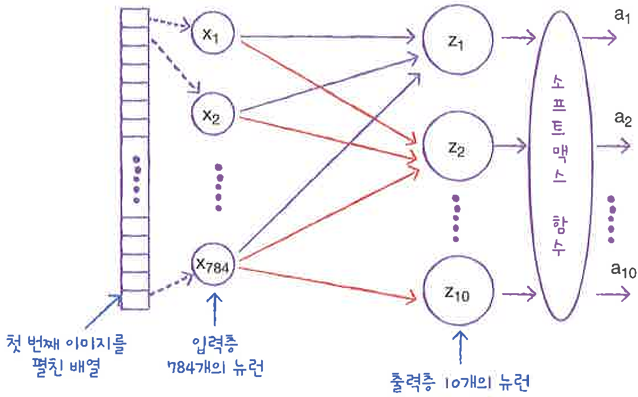

- 활성화 함수: 소프트맥스와 같이 뉴련의 선형 방정식 계산 결과에 적용되는 함수

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- compile(): 케라스 모델은 훈련하기 전에 설정 단계가 있는데 꼭 손실함수의 종류를 지정해야 한다.
- 이진 분류: loss = 'binary_crossentropy'
- 다중 분류: loss = 'categorical_crossentropy'
- 'sparse_categorical_crossentropy': 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것 -> 텐서플로에서 이렇게 설정하면 변환을 수행할 필요가 없다.

- 원-핫 인코딩: 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것
- 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서 변환이 필요하다.

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7352 - loss: 0.7833
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.4804
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8457 - loss: 0.4514
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8490 - loss: 0.4445
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4281


In [ ]:
model.evaluate(val_scaled, val_target) #케라스에서 모델의 성능을 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.4330


[0.43975406885147095, 0.8477500081062317]

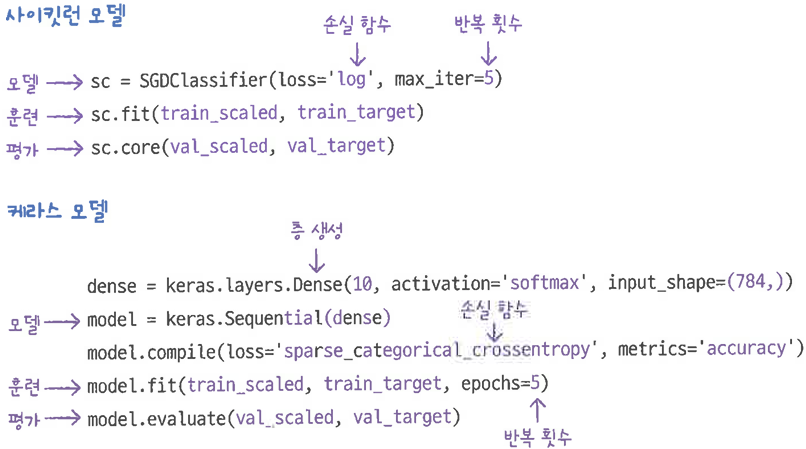

#7-2. 심층 신경망(DNN)

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state=42)

- 은닉층: 입력층과 출력층 사이에 있는 모든 층
- 출력층에 적용하는 활성화 함수는 종류가 제한되어 있지만 은닉층의 활성화 함수는 자유롭다.

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax') #출력층

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 100개의 뉴런, 활성화 함수는 sigmoid, 입력의 크기는 (784,)
- 은닉층의 뉴런은 출력층의 뉴런보다 많이 만들어야 한다.

In [4]:
model = keras.Sequential([dense1, dense2])

- 여러 개의 층을 추가하려면 은닉층에서 마지막 출력층의 순서로 나열해야 한다.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = keras.Sequential(
    [keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),name='hidden'),
    keras.layers.Dense(10, activation='softmax',name='output')],
    name = '패션 MNIST 모델')

- 굳이 dense1, dense2로 쓰지 않고 Sequential클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 더 많다.

In [7]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7575 - loss: 0.7634
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8501 - loss: 0.4230
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8628 - loss: 0.3812
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8721 - loss: 0.3582
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8772 - loss: 0.3373


##렐루 함수
: 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수이다. 입력이 양수일 경우 마치 활성화 함수가 없는  것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다.
- 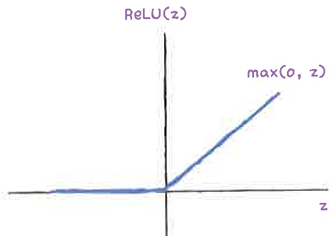
- 이미지 처리에서 좋은 성능을 낸다.

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
- 인공 신경망의 성능을 위해 기여하는 역할은 X
- Flatten 층은 입력층 바로 뒤에 추가한다.

In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 케라스 API는 입력 데이터에 대한 전처리 과정을 될 수 있으면 모델에 포함한다.

In [13]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.7012
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4118
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8708 - loss: 0.3492
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8821 - loss: 0.3278
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8858 - loss: 0.3164


In [15]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.3595


[0.3607594668865204, 0.8768333196640015]

##옵티마이저
: 신경망의 가중치와 절편을 학습하기 위한 알고리즘

- 기본 경사 하강법: 고정된 학습률을 사용해서 손실 함수의 기울기를 따라 매개변수를 업데이트하는 가장 단순한 방법
- 적응적 학습률: 매개변수마다 학습률을 다르게 설정하거나, 학습률을 동적으로 조정하는 방법

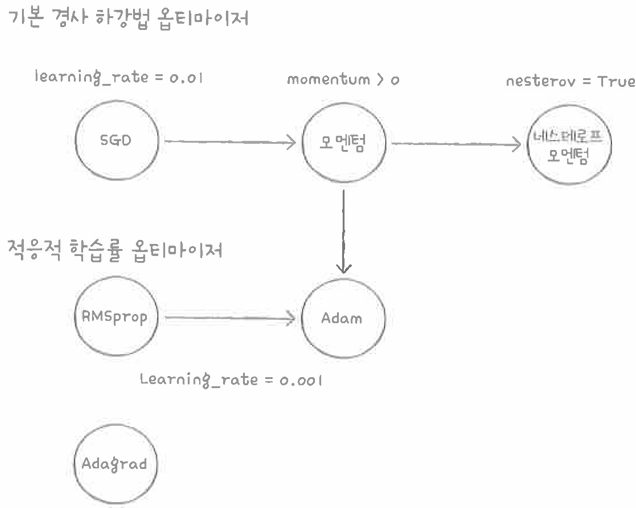

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7707 - loss: 0.6712
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8557 - loss: 0.4104
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8672 - loss: 0.3580
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8761 - loss: 0.3353
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8878 - loss: 0.3054


In [21]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8864 - loss: 0.3289


[0.33195844292640686, 0.8820000290870667]

#7-3. 신경망 모델 훈련

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [3]:
model= model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

- verbose 매개변수는 훈련 과정 출력을 조절한다.
 - 기본값은 1로 에포크 마다 진행 막대와 손실 등의 지표가 출력된다.
 - 2는 진행 막대를 빼고 출력한다.
 - 0은 훈련 과정을 나타내지 않는다.

In [5]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- history 객체에는 훈련 측정값이 담겨있는 history 딕셔너리가 들어있다.

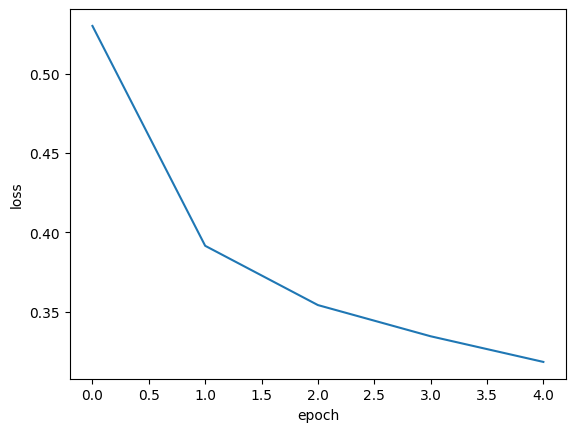

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

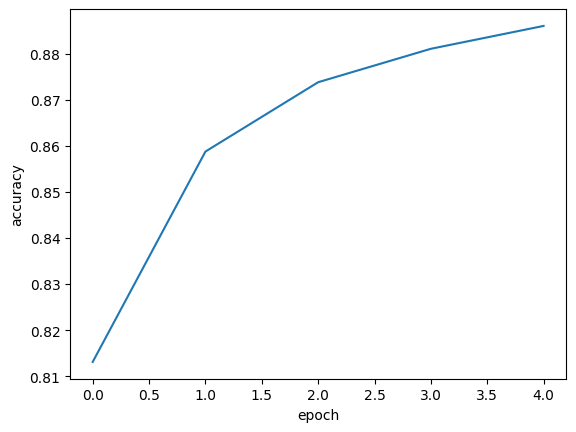

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

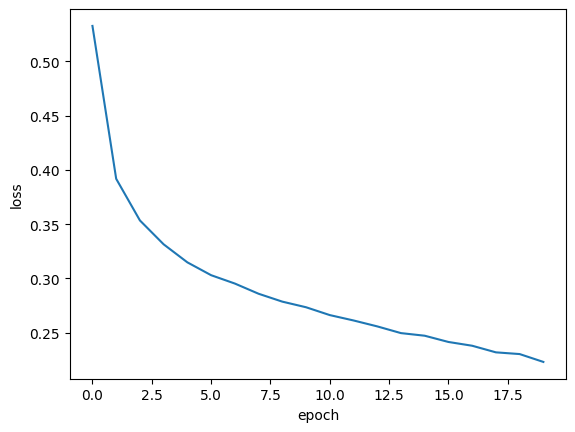

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


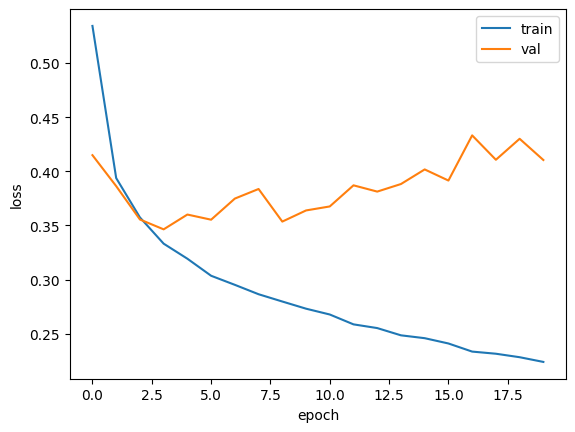

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

<ipython-input-12-8ba945a6149d>:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('train','val')


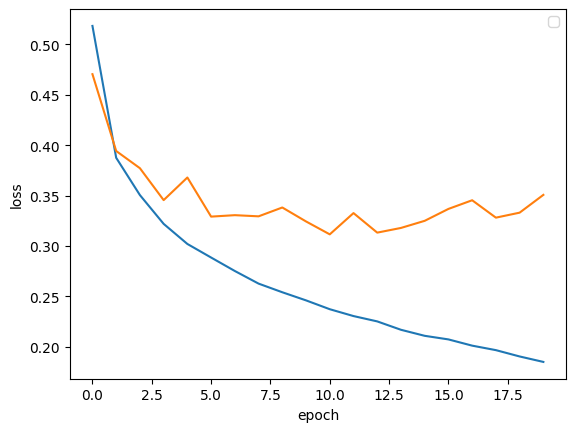

In [12]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train','val')
plt.show()

- 과대 적합을 완화시키기 위해서 옵티마이저 하이퍼파라미터를 조정할 수 있다.
- 기본 RMSprop 옵티마이저는 많은 문제에서 잘 잘동하는데 다른 옵티마이저를 테스트 하고 싶다면 Adam이 좋은 석택이다.
- Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.

##드롭아웃
: 은닉층에 있는 뉴런의 출력을 랜덤하게 껴서(즉 뉴런의 출력을 0으로 만들어) 과대 적합을 막는 기법
- 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다.

In [13]:
model = model_fn(keras.layers.Dropout(0.3)) #30%정도 드롭아웃
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다.
- 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.
- 드롭 아웃은 훈련 중에 적용되며 평가나 예측에서는 적용되지 않는다. 텐서플로가 자동으로 처리해준다.

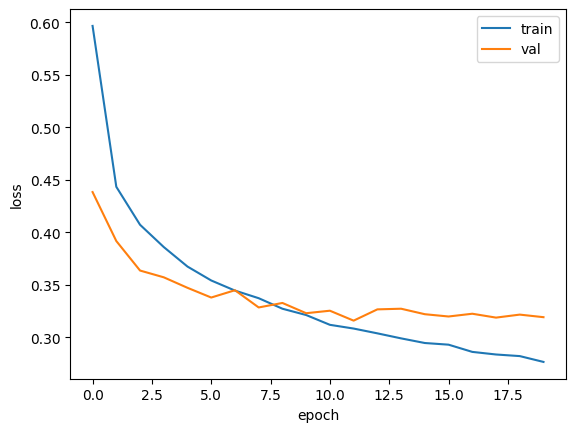

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##모델 저장, 복원

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [22]:
model.save_weights('model.weights.h5') #훈련된 모델의 파라미터를 저장

- 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

In [23]:
model.save('model-whole.h5') #모델 구조와 모델 파라미터를 함께 저장

In [24]:
!ls -al *.h5

-rw-r--r-- 1 root root 971928 Jan 15 05:50 model.weights.h5
-rw-r--r-- 1 root root 978584 Jan 15 05:55 model-whole.h5


In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5') # save_weights() 와 쌍을 이룸

- 훈련하지 않은 새로운 모델을 만들어서 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

In [27]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
0.8811666666666667


- predict 메서는 결과에서 가장 큰 값을 고르기 위해 argmax 함수를 사용 -> 가장 큰 인덱스를 반환
- axis= -1은 배열의 마지막 차원을 말한다.

In [28]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3313


[0.33180490136146545, 0.8811666369438171]

- 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력한다.

##콜백
: 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
model.fit(train_scaled, train_target,epochs=20,verbose=0, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장한다.
- 모델이 훈련한 후에 best-model.keras에 최상의 검증 점수를 낸 모델이 저장된다.

In [37]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8901 - loss: 0.3136


[0.31405070424079895, 0.8885833621025085]

##조기종료
: 검증 점수가 더 이상 감소하지 않고 상승하여 과대 적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

- EarlyStopping 콜백에 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.
  - ex) patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
- restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
- 즉 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지, 그런 다음 현재 현재 모데르이 파라미터를 최상의 파라미터로 되돌린다.

In [44]:
print(early_stopping_cb.stopped_epoch) #훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지 되었는지 확인

11


- 에포크 횟수가 0부터 시작하기 때문에 11은 열두 번째 에포크에서 훈련이 중지
- 최상의 에포크는 열 번째

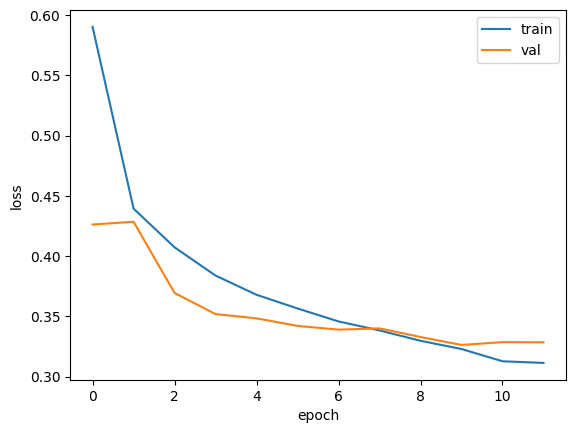

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 즉, 열 번째(9)에서 가장 낮은 손실을 기록 열 두번째(11)에서 훈련이 중지

In [46]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8796 - loss: 0.3216


[0.3262059688568115, 0.8794999718666077]